# Polynomial Linear Regression
- We know about simple & multiple linear regression. How this polynomial linear regression differs from them?
- Polynomial Linear Regression also has a single feature variable, but its degree (power) will be up to N.
- Algorithm Type: **Regression**
- Number of the independent variable (X) = **Only 1 with n degrees**
- Number of dependent variable (Y) = **1**
- This algorithm follows a polynomial linear regression equation

<img src="../static/polynomial_linear_regression_eqn.png" alt="polynomial_linear_regression_eqn.png">

## Data preprocessing
- Import the necessary libraries.
- Load dataset (Position_Salaries.csv).
- Our dataset doesn't have any missing so, we can skip that step.
- We have categorical string data, but they are already labeled in another column called **Level** so, we can skip that step as well.
- We only have 10 data when we split this dataset into training and test, our algorithm doesn't give proper prediction! So, we can skip this step as well.
- Polynomial regression algorithms are an equation type so, it is having a constant to make the model standardize, so we don't need feature scaling for this algorithm.

In [1]:
# Import the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r"../dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values # [row, column]
Y = dataset.iloc[:, -1].values
print("Dataset", dataset, "X", X, "Y", Y, sep="\n")

Dataset
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Y
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Train Polynomial Linear Regression Model

In [3]:
# converting normal feature x to x^n ....
from sklearn.preprocessing import PolynomialFeatures
x_ploy = PolynomialFeatures(degree=3).fit_transform(X) # how higher the degree is directly proportional to the algorithm result
print(x_ploy)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [4]:
from sklearn.linear_model import LinearRegression
linear_ploy_regressor = LinearRegression()
linear_ploy_regressor.fit(x_ploy, Y)

LinearRegression()

## Check and visualize result

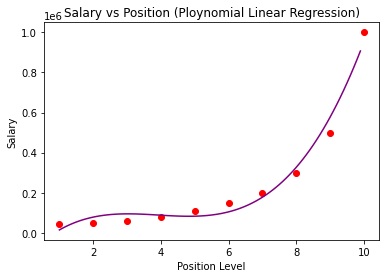

In [5]:
# we are making x grid to see smooth & clean curve....
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# Passing grid to plt to draw plot....
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, linear_ploy_regressor.predict( PolynomialFeatures(degree=3).fit_transform(X_grid)), color = 'purple')
plt.title("Salary vs Position (Ploynomial Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Compare polynomial regression with simple regression
- Can you guess what will be the out for simple linear regression? 😉

In [6]:
from sklearn.linear_model import LinearRegression
linear_simple_regressor = LinearRegression()
linear_simple_regressor.fit(X, Y)

LinearRegression()

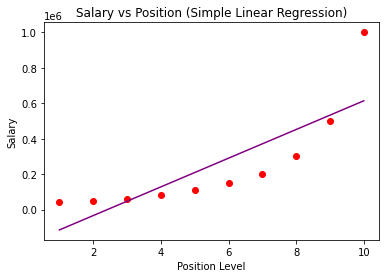

In [7]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x=X, y=Y, color='red')
plt.plot(X, linear_simple_regressor.predict(X), color='purple')
plt.title("Salary vs Position (Simple Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Simple vs Polynomial Linear Regression Result
- We can clearly see that Simple linear regression is not matching with the data set completely 😮

## Test with new data

In [8]:
print("Simple Linear Regression :", linear_simple_regressor.predict([[6.5]]))
print("Polynomial Linear Regression :", linear_ploy_regressor.predict(PolynomialFeatures(degree=3).fit_transform([[6.5]])))

Simple Linear Regression : [330378.78787879]
Polynomial Linear Regression : [133259.46969697]
